In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')
%matplotlib inline


df= pd.read_csv('covid19.csv')


In [165]:
df


,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday
0,35,Ontario,Ontario,31-01-2020,3,0,0,3,NaN,NaN,NaN,NaN,3.0,3.0
1,59,British Columbia,Colombie-Britannique,31-01-2020,1,0,0,1,NaN,NaN,NaN,NaN,1.0,1.0
2,1,Canada,Canada,31-01-2020,4,0,0,4,NaN,NaN,NaN,NaN,4.0,4.0
3,35,Ontario,Ontario,08-02-2020,3,0,0,3,NaN,NaN,NaN,NaN,0.0,0.0
4,59,British Columbia,Colombie-Britannique,08-02-2020,4,0,0,4,NaN,NaN,NaN,NaN,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,60,Yukon,Yukon,07-04-2020,7,0,0,7,775.0,NaN,NaN,NaN,NaN,NaN
473,61,Northwest Territories,Territoires du Nord-Ouest,07-04-2020,5,0,0,5,1217.0,NaN,NaN,NaN,NaN,NaN
474,62,Nunavut,Nunavut,07-04-2020,0,0,0,0,234.0,NaN,NaN,NaN,NaN,NaN
475,99,Repatriated travellers,Voyageurs rapatriés,07-04-2020,13,0,0,13,NaN,NaN,NaN,NaN,NaN,NaN


<h1>Cleaning Data Set

In [186]:
df.drop(['pruid','prnameFR'], axis=1,inplace=True)
df.rename(columns = {'prname':'Location', 'date':'Date', 
                              'numconf':'Confirmed Cases',
                              'numprob':'Probable Cases',
                              'numdeaths':'Number of Deaths',
                              'numtotal':'Total Cases',
                               'numtested':'Number Tested',
                                'numtoday':'New Cases Today',
                               'percenttoday':'Percentage'}, inplace = True) 


In [187]:
mask = df['Location'].isin(['Canada'])
prov=df[~mask]
prov = prov.set_index('Location')
prov = prov.rename(index={'Repatriated travellers':'Repatriated Travellers'})


prov_data=prov.groupby(['Location'])['Total Cases'].sum().sort_values(ascending=False).to_frame()
prov_data.style.background_gradient(cmap='Reds')


,Total Cases
Location,
Quebec,68849
Ontario,37292
British Columbia,17420
Alberta,13716
Saskatchewan,2824
Nova Scotia,2596
Newfoundland and Labrador,2298
Manitoba,1880
New Brunswick,1149


Text(0, 0.5, 'Confirmed Cases')

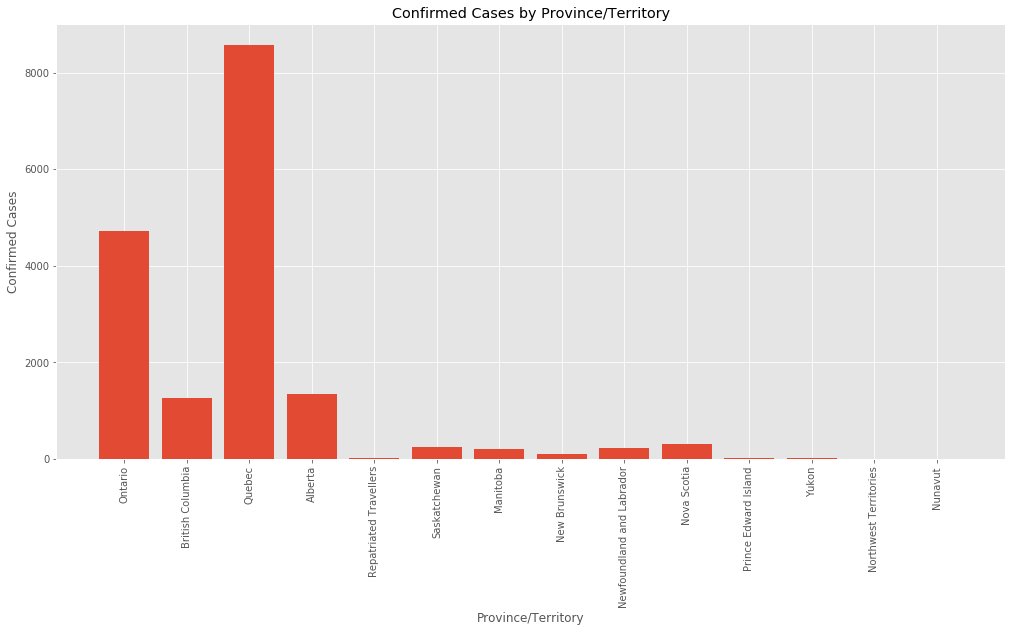

In [188]:
plt.rcParams['figure.figsize']=17,8
plt.bar(prov.index,prov['Total Cases'])
plt.xticks(rotation=90)
plt.title('Confirmed Cases by Province/Territory')

plt.xlabel('Province/Territory')
plt.ylabel('Confirmed Cases')


Text(0, 0.5, 'Confirmed Cases')

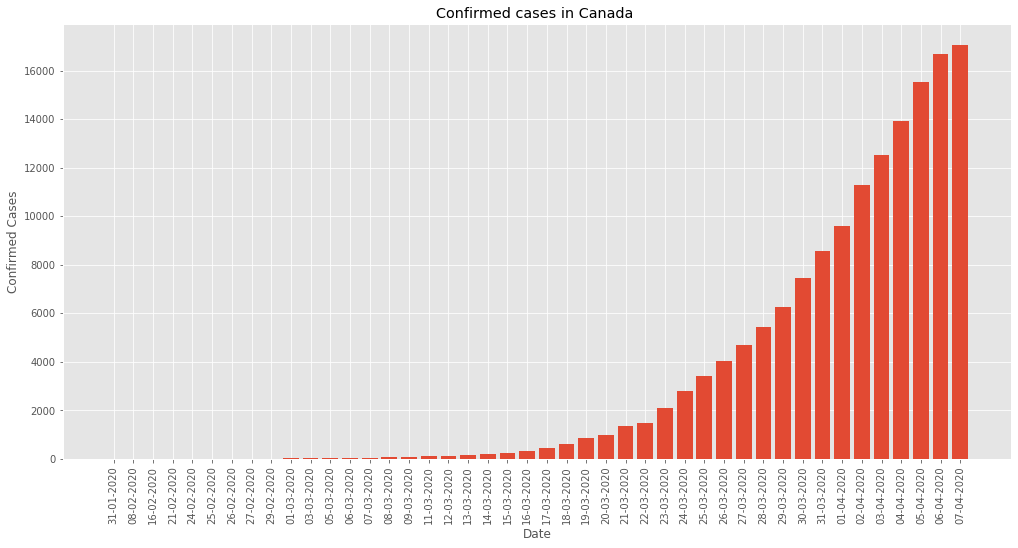

In [189]:
mask = df['Location'].isin(['Canada'])
nat=df[mask]

# plt.rcParams['figure.figsize']=17,8
plt.bar(nat['Date'],nat['Total Cases'])
plt.xticks(rotation=90)

plt.title('Confirmed cases in Canada ')

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')

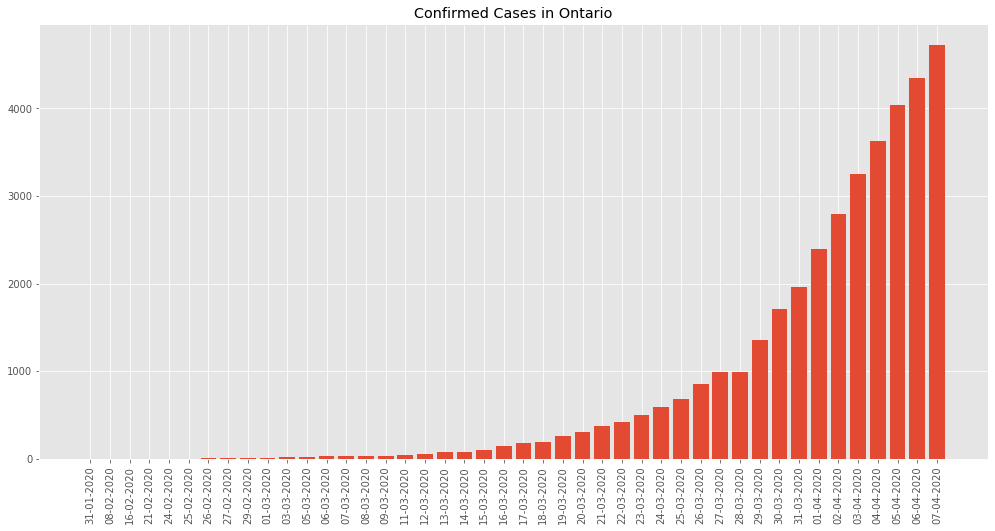

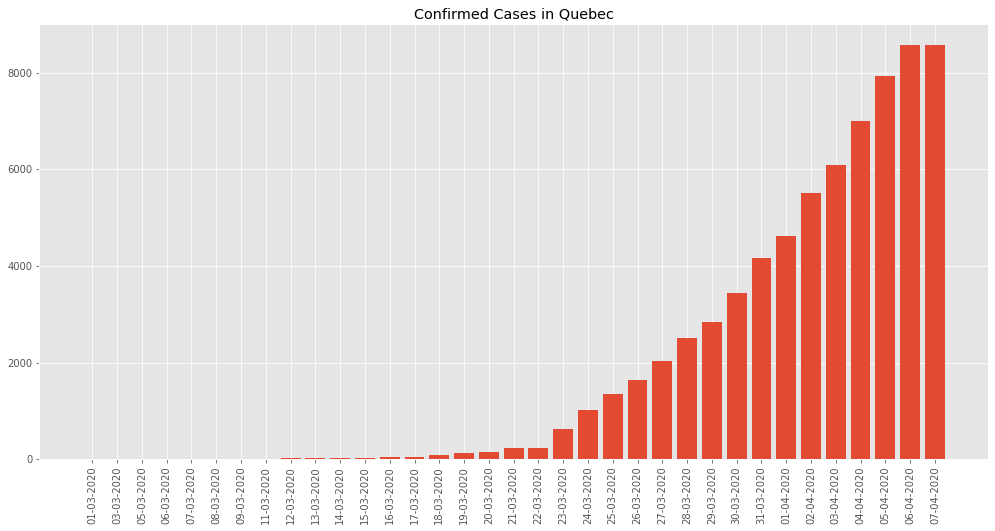

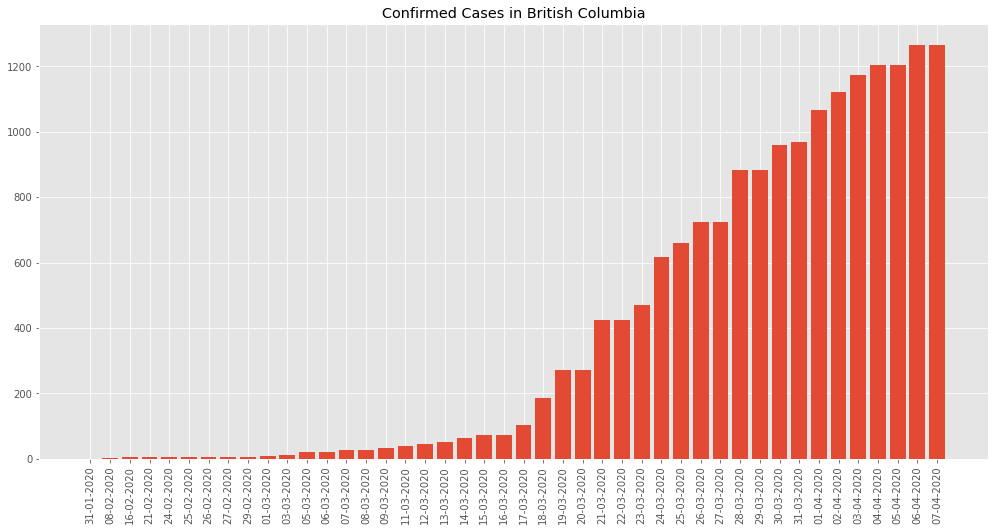

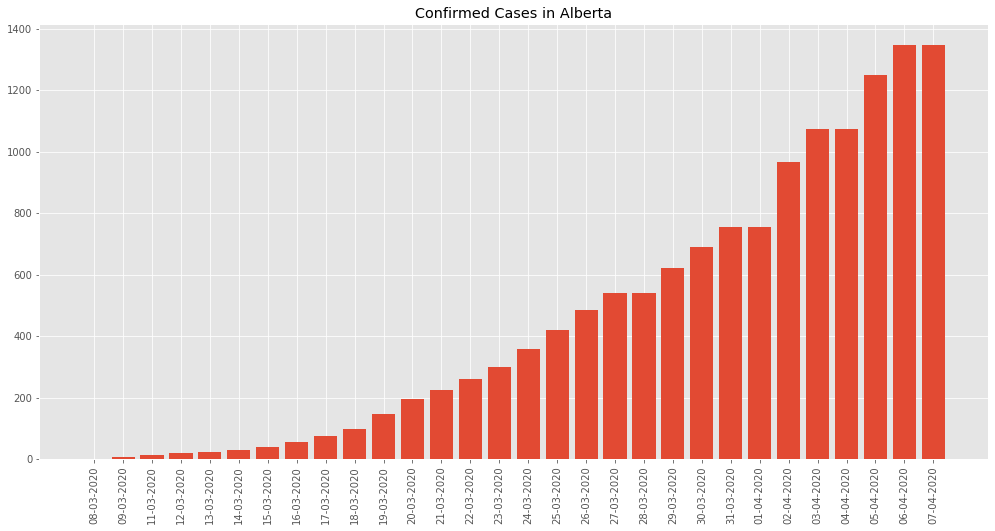

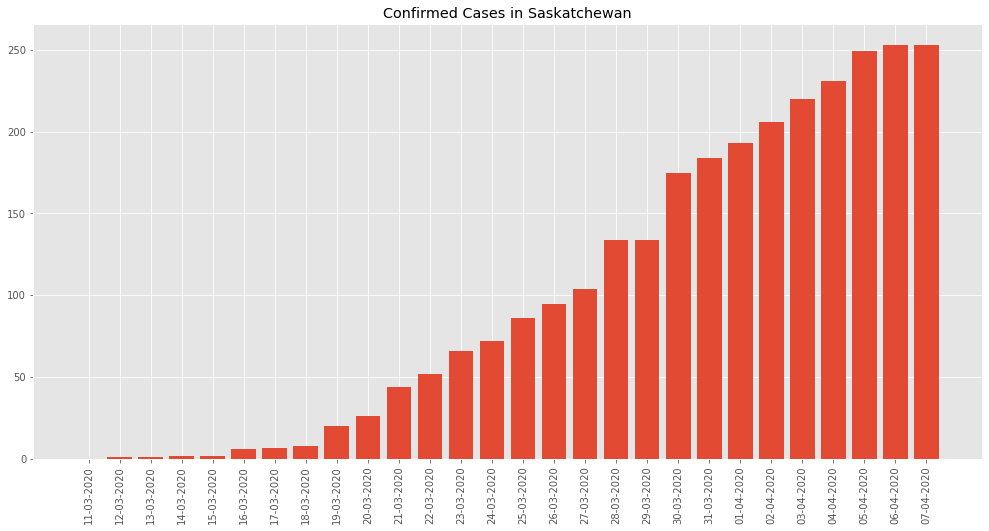

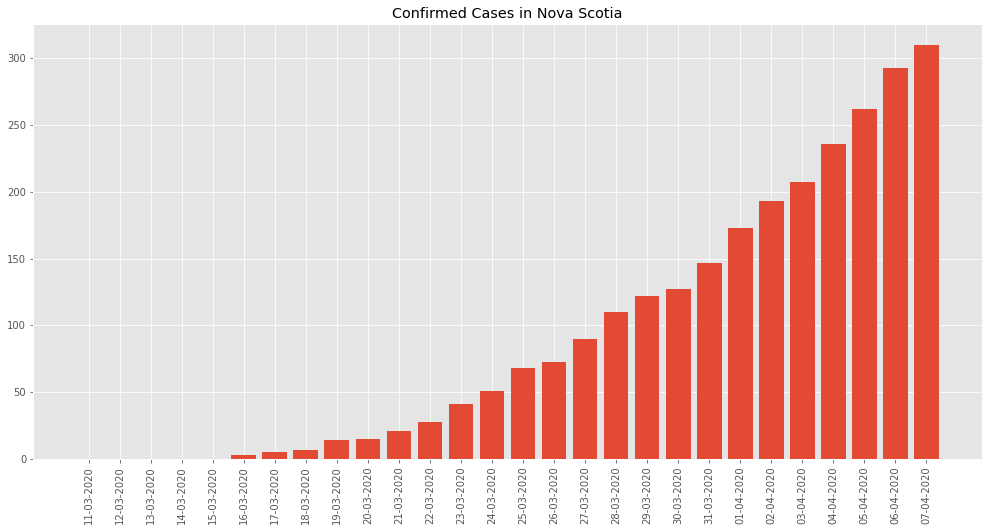

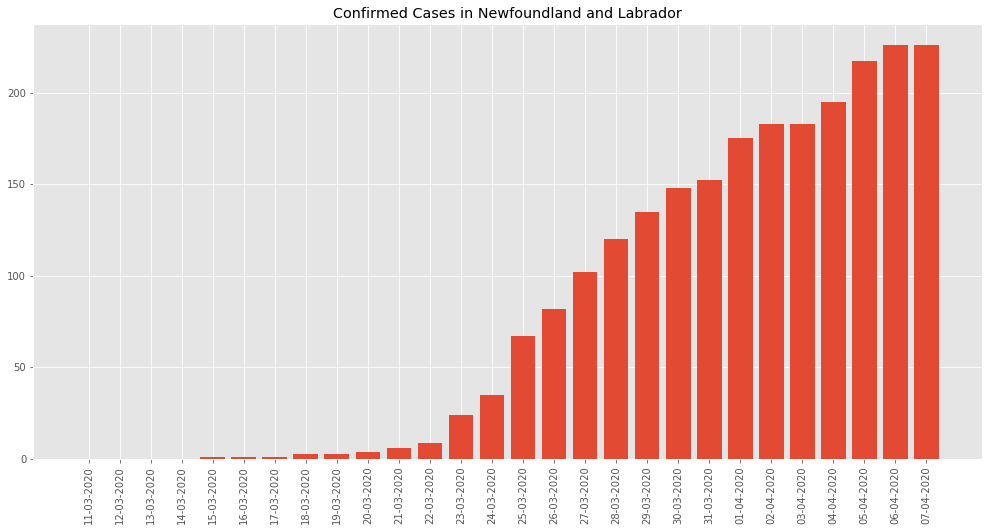

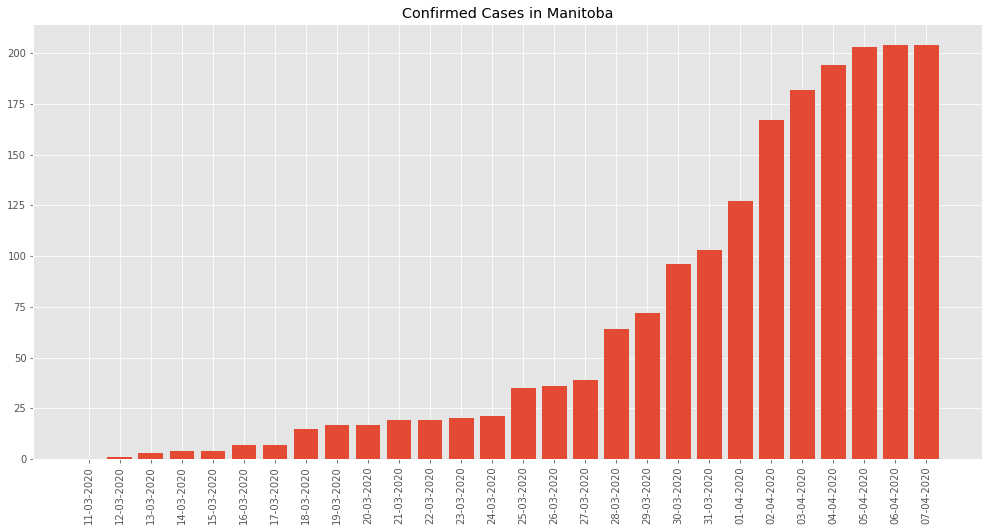

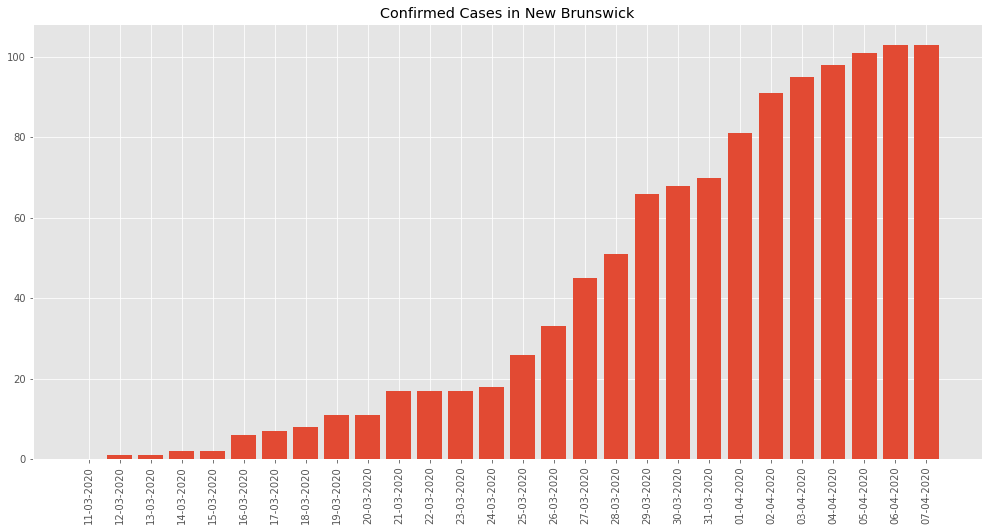

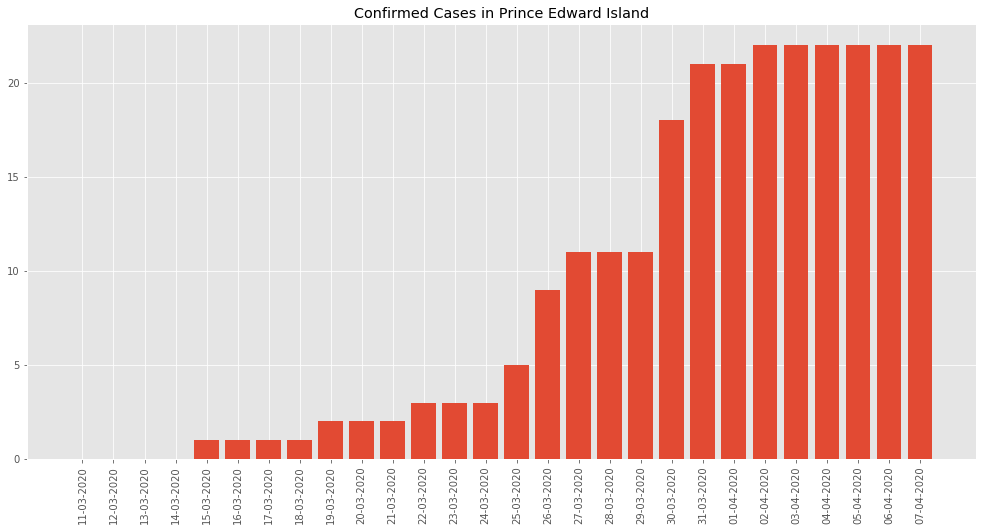

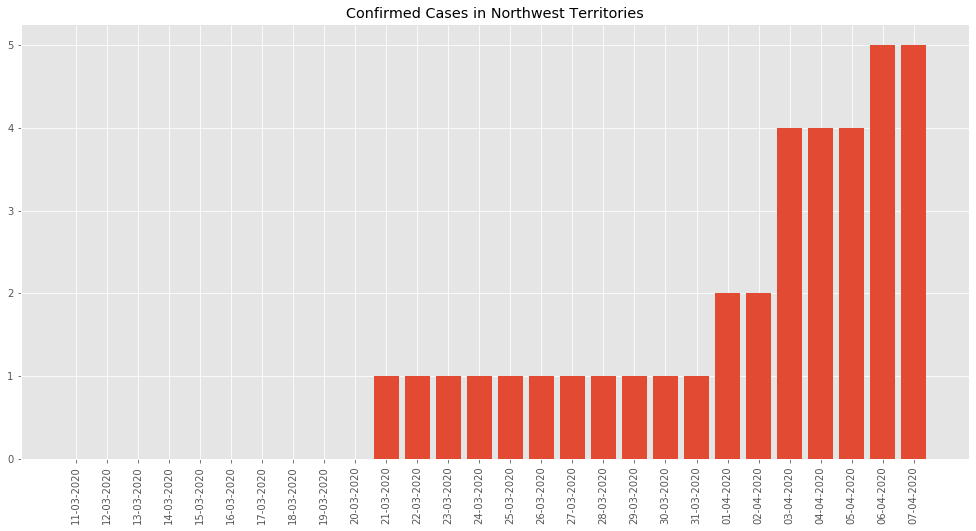

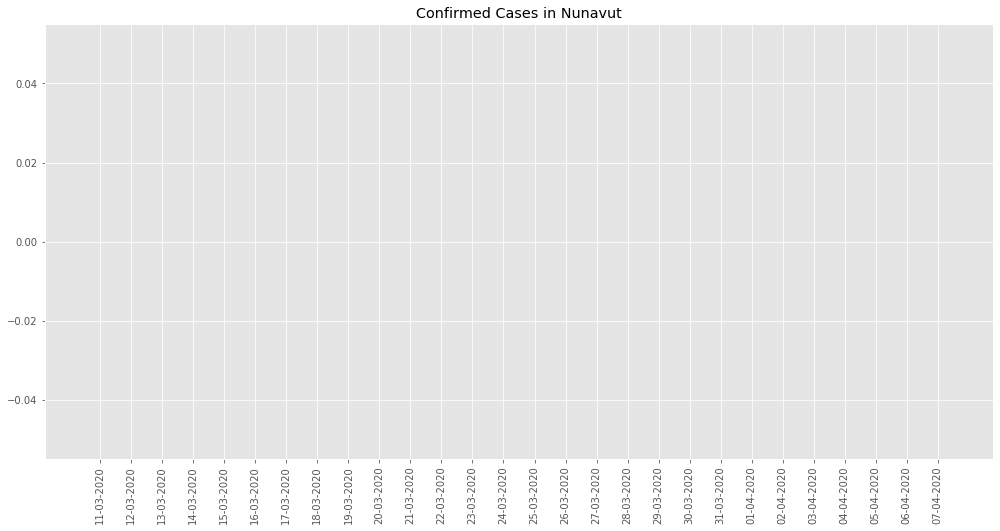

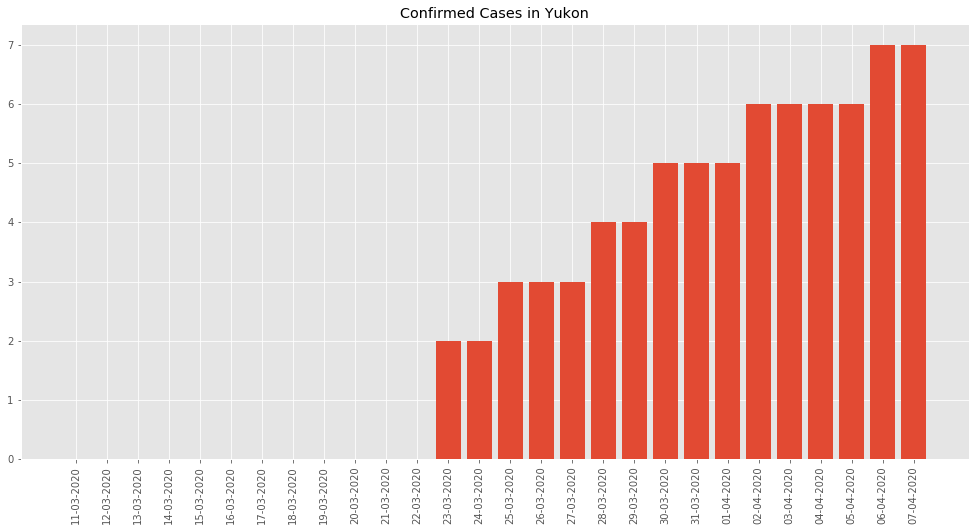

In [239]:
 locations =['Ontario','Quebec','British Columbia','Alberta','Saskatchewan','Nova Scotia','Newfoundland and Labrador',
           'Manitoba','New Brunswick','Prince Edward Island','Northwest Territories','Nunavut','Yukon']

for i in range(len(locations)):
    plt.figure()
    temp = df[df['Location']==locations[i]]
    plt.title(f'Confirmed Cases in {locations[i]}')
    plt.bar(temp['Date'] ,temp['Total Cases'])
   
    plt.xticks(rotation=90)

plt.show()






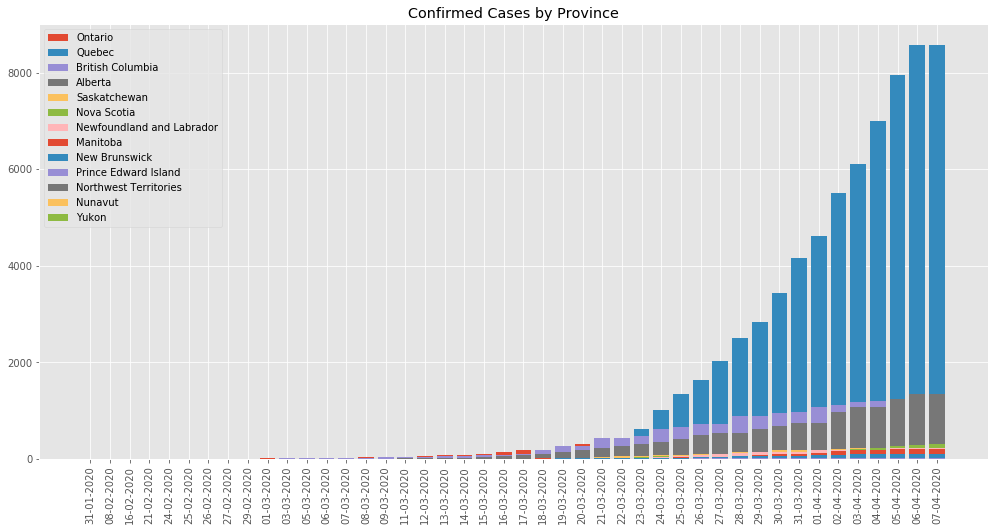

In [241]:
locations =['Ontario','Quebec','British Columbia','Alberta','Saskatchewan','Nova Scotia','Newfoundland and Labrador',
           'Manitoba','New Brunswick','Prince Edward Island','Northwest Territories','Nunavut','Yukon']

for i in range(len(locations)):
    
    temp = df[df['Location']==locations[i]]
    plt.bar(temp['Date'] ,temp['Total Cases'])
plt.xticks(rotation=90)
plt.title(f'Confirmed Cases by Province/Territory')
plt.legend(locations)